In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/budget_eval.csv",index_col = 0)

In [4]:
df = df[df['institution_type'] == 'Public']

In [5]:
df.head()

,"Tuition and fees, after deducting discounts and allowances",Private operating grants and contracts,Sales and services of educational activities,"Gifts, including contributions from affiliated organizations",Student services - Current year total,Instruction - Current year total,Scholarships and fellowships expenses -- Current year total,Research - Current year total,Academic support - Current year total,unitid,year,Total Profit,gen_profit,label,Gini_gender,Gini_ethnics,Gini_income,edu_fairness_score,institution_type,is_good
0,44478131,693319,2938358,1901250,17112095,36577788,16282814.0,8695373,7469575,100654,2015,3237071.0,-36126587.0,2.0,0.498123,0.184040,0.952738,0.544967,Public,0.0
1,169724524,53545645,60916483,54203316,36186665,290202160,21113044.0,263499157,174340904,100663,2015,31527362.0,-446951962.0,2.0,0.481327,0.573588,0.949097,0.668004,Public,0.0
2,53743262,2253842,4159834,5930707,18648547,63998908,1128515.0,73230600,13017908,100706,2015,-17322838.0,-103936833.0,2.0,0.493836,0.537370,0.949532,0.660246,Public,0.0
3,42073093,2426675,0,372863,17115864,42207002,19421243.0,2783180,12502469,100724,2015,-9835537.0,-49157127.0,2.0,0.478008,0.188271,0.939704,0.535328,Public,0.0
5,452717202,5101388,11232780,53728959,60217870,349098169,23505262.0,59670300,89483228,100751,2015,78465326.0,-59194500.0,2.0,0.498187,0.445043,0.954347,0.632526,Public,0.0


In [6]:
max_fairness = df["edu_fairness_score"].max()
min_fairness = df["edu_fairness_score"].min()

df["edu_fairness_score"] = (df["edu_fairness_score"] - min_fairness) / (max_fairness - min_fairness)
max_profit = df["gen_profit"].max()
min_profit = df["gen_profit"].min()

df["gen_profit"] = (df["gen_profit"] - min_profit) / (max_profit - min_profit)

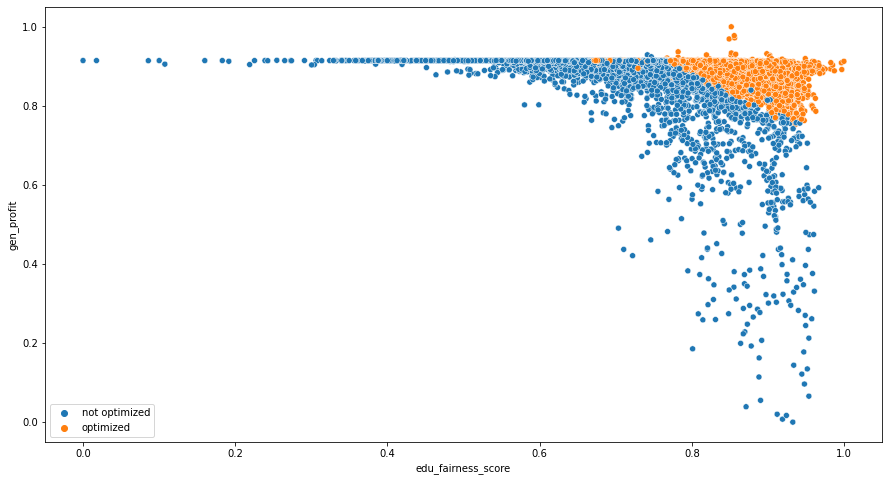

In [7]:
df['classfication'] = df["is_good"].map({0: "not optimized", 1: "optimized"})
plt.figure(figsize=(15,8))
sns.scatterplot(x=df["edu_fairness_score"], y=df["gen_profit"], hue = df["classfication"])
plt.legend(loc='lower left')
plt.savefig("budget.jpg", dpi=250)

(0.4, 1.1)

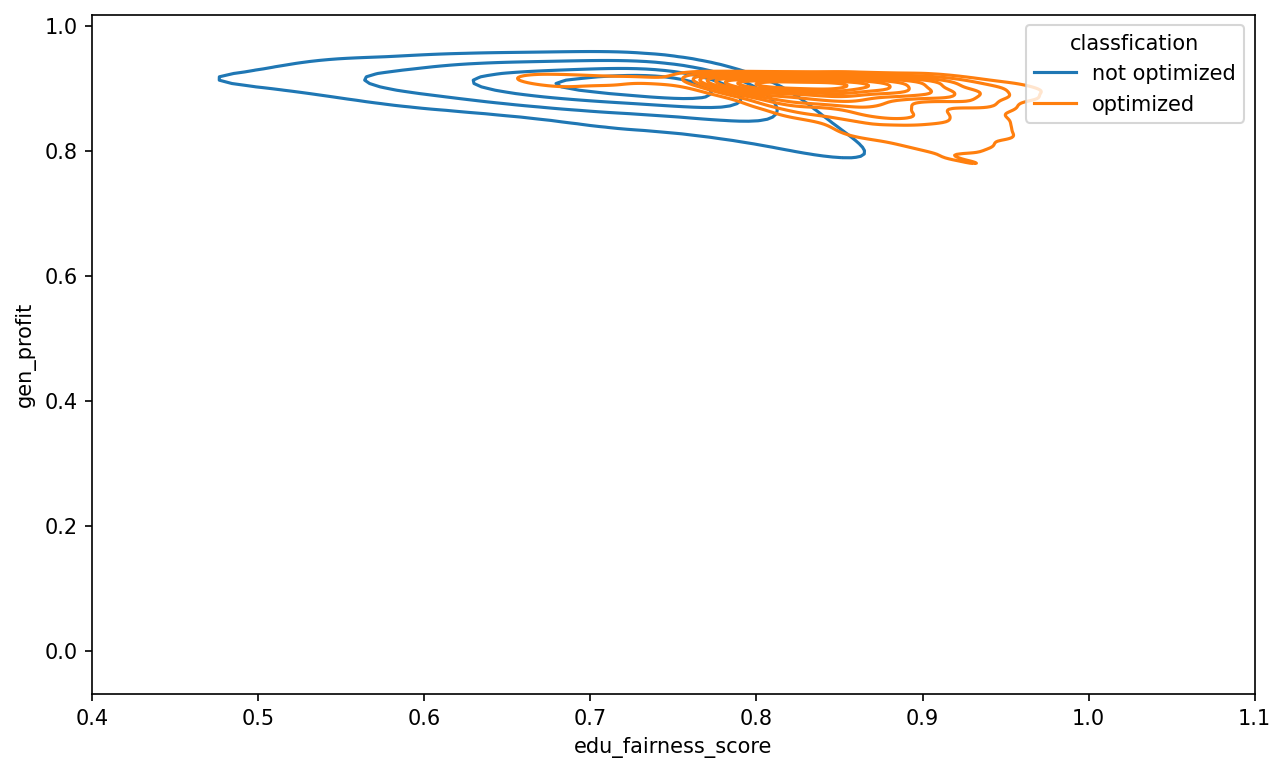

In [12]:
# with xlim/ylim
fig, kde = plt.subplots(figsize = (10,6), dpi = 150)
kde = sns.kdeplot(x=df["edu_fairness_score"], y=df["gen_profit"], hue = df["classfication"])
kde.set_xlim(left=0.4, right=1.1)
#kde.set_xlim(left=0.4, right=1.1)
# plt.legend(loc='lower left')
# plt.savefig("../fig/kde-budget.jpg", dpi=250)

In [ ]:
good = df[df['is_good'] == 1.0].iloc[:,0:9]
good.head()

,"Tuition and fees, after deducting discounts and allowances",Private operating grants and contracts,Sales and services of educational activities,"Gifts, including contributions from affiliated organizations",Student services - Current year total,Instruction - Current year total,Scholarships and fellowships expenses -- Current year total,Research - Current year total,Academic support - Current year total
6,3554902,0,2813,7998,2625671,10166341,3417042.0,0,2557404
8,32598385,436733,0,771808,7028022,27635836,3391790.0,418332,4822228
10,2657361,0,0,0,2386586,6217324,3163331.0,0,978377
11,3514450,0,0,301335,2395512,9260788,1914511.0,0,877329
13,4092621,55414,92410,0,7426807,25172119,1798324.0,0,3567817


In [ ]:
bad = df[df['is_good'] == 0.0].iloc[:,0:9]

In [ ]:
bad.head()

,"Tuition and fees, after deducting discounts and allowances",Private operating grants and contracts,Sales and services of educational activities,"Gifts, including contributions from affiliated organizations",Student services - Current year total,Instruction - Current year total,Scholarships and fellowships expenses -- Current year total,Research - Current year total,Academic support - Current year total
0,44478131,693319,2938358,1901250,17112095,36577788,16282814.0,8695373,7469575
1,169724524,53545645,60916483,54203316,36186665,290202160,21113044.0,263499157,174340904
2,53743262,2253842,4159834,5930707,18648547,63998908,1128515.0,73230600,13017908
3,42073093,2426675,0,372863,17115864,42207002,19421243.0,2783180,12502469
5,452717202,5101388,11232780,53728959,60217870,349098169,23505262.0,59670300,89483228


In [ ]:
bad.describe()

,"Tuition and fees, after deducting discounts and allowances",Private operating grants and contracts,Sales and services of educational activities,"Gifts, including contributions from affiliated organizations",Student services - Current year total,Instruction - Current year total,Scholarships and fellowships expenses -- Current year total,Research - Current year total,Academic support - Current year total
count,5.457000e+03,5.457000e+03,5.457000e+03,5.457000e+03,5.457000e+03,5.457000e+03,5.457000e+03,5.457000e+03,5.457000e+03
mean,5.983261e+07,8.648134e+06,9.224612e+06,7.126639e+06,1.311483e+07,7.678009e+07,1.065826e+07,3.250894e+07,2.248071e+07
std,1.389930e+08,4.214171e+07,6.768219e+07,2.811101e+07,2.293505e+07,1.724964e+08,2.193784e+07,1.180217e+08,6.191814e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.180548e+06,0.000000e+00,2.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.372255e+06,0.000000e+00,0.000000e+00,0.000000e+00,9.969250e+05,4.388801e+06,4.575300e+05,0.000000e+00,6.535140e+05
50%,7.249698e+06,6.668000e+03,1.051400e+04,9.315600e+04,4.295943e+06,1.571207e+07,2.708433e+06,0.000000e+00,3.110174e+06
75%,4.426800e+07,1.017633e+06,6.855560e+05,1.475123e+06,1.591184e+07,6.749817e+07,9.962331e+06,1.463566e+06,1.580321e+07
max,1.550581e+09,9.139530e+08,2.145629e+09,3.788560e+08,2.756498e+08,2.710436e+09,2.929140e+08,1.097886e+09,9.970402e+08


In [ ]:
bad.plot(kind='pie', subplots=True, figsize=(16,8))

ValueError: ignored

In [ ]:
new = pd.DataFrame({
   "": mean,"Reg_Price": [7000, 1500, 5000, 8000, 9000, 6000]
})

In [ ]:
bad = bad.melt(var_name = 'budget_type', value_name='amount')

In [ ]:
bad.head()

,budget_type,amount
0,"Tuition and fees, after deducting discounts an...",44478131.0
1,"Tuition and fees, after deducting discounts an...",169724524.0
2,"Tuition and fees, after deducting discounts an...",53743262.0
3,"Tuition and fees, after deducting discounts an...",42073093.0
4,"Tuition and fees, after deducting discounts an...",452717202.0


In [ ]:
.plot(kind='pie', subplots=True, figsize=(16,8))


In [ ]:
from scipy.stats import ks_2samp

x = df[df["is_good"]==1].edu_fairness_score.values[:-2]
y = df[df["is_good"]==0].edu_fairness_score.values

ks_2samp(x, y)

KstestResult(statistic=0.7797324537291552, pvalue=0.0)

In [ ]:
x = df[df["is_good"]==1].gen_profit.values[:-2]
y = df[df["is_good"]==0].gen_profit.values

ks_2samp(x, y)

KstestResult(statistic=0.16364302730437968, pvalue=3.595326564614528e-64)